In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RGB_image:
    """
    RGB image processing

    ...

    Attributes
    ----------
    np_img : numpy.ndarray
        the image converted to np array

    Methods
    -------
    get_rgb_hist()
        Returns an array with the RGB(A) histogram values of the image.
    show_channels()
        Splits the image into RGB(A) channels and displays them separately.
    plot_rgb_hist(hist, normalize=False, yscale_type='linear')
        Displays histograms of RGB channels.
"""

    def __init__(self, image):
        self.img_mode = image.mode
        self.np_img = np.asarray(image)
    
    
    def __normalize_data(self, data):
        return (data - data.min()) / (data.max() - data.min())
    
    
    def get_rgb_hist(self):
        r = np.zeros((256,))
        g = np.zeros((256,))
        b = np.zeros((256,))

        for i, c in enumerate([r, g, b]):
            channel = self.np_img[:,:,i].flatten()
            for j in range(channel.size):
                val = channel[j]
                c[val] += 1
        return np.array([r, g, b])
    
    
    def show_channels(self):
        fig=plt.figure(figsize=(16, 8))
        columns = 2
        rows = 2

        for i in range(4):
            temp = np.zeros(self.np_img.shape, dtype='uint8')
            if i == 0:
                temp=self.np_img
            else:
                temp[:,:,i-1] = self.np_img[:,:,i-1] 
                if self.img_mode=='RGBA': 
                    temp[:,:,3] = self.np_img[:,:,3] 
            fig.add_subplot(rows, columns, i+1)
            plt.imshow(temp)

        plt.show()

        
    def plot_rgb_hist(self, hist, normalize=False, yscale_type='linear'):
        if normalize:
            temp_hist = np.array([__normalize_data(data) for data in hist])
        else:
            temp_hist = hist

        fig=plt.figure(figsize=(20, 5), dpi=150)
        columns = 3
        rows = 1

        for i, c in enumerate(['r','g','b']):
            fig.add_subplot(1, 3, i+1)
            plt.bar(np.arange(0, 256), temp_hist[i], width=1.0, color=c)

            plt.xlabel('brightness')
            plt.ylabel('number of pixels')
            plt.title(c + ' channel')

            plt.grid(True)
            plt.yscale(yscale_type)

        plt.show()

In [3]:
img_path = input("Enter file path: ") 

Enter file path: 1.jpg


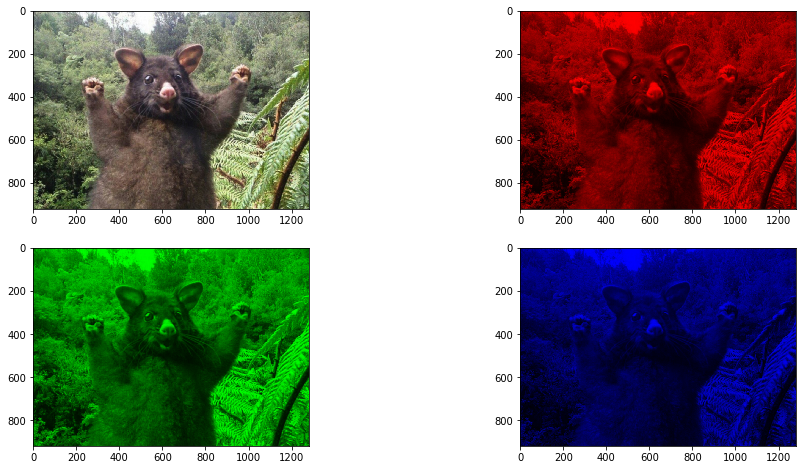

In [4]:
image = RGB_image(Image.open(img_path))
image.show_channels()


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [139]:
orig_img_pil = Image.open(input("Enter original image path: "))
ref_img_pil = Image.open(input("Enter reference image path: "))

Enter original image path: orig2.png
Enter reference image path: ref.png


In [140]:
orig_image = np.asarray(orig_img_pil)
ref_image = np.asarray(ref_img_pil)

Text(0.5, 1.0, 'Reference image')

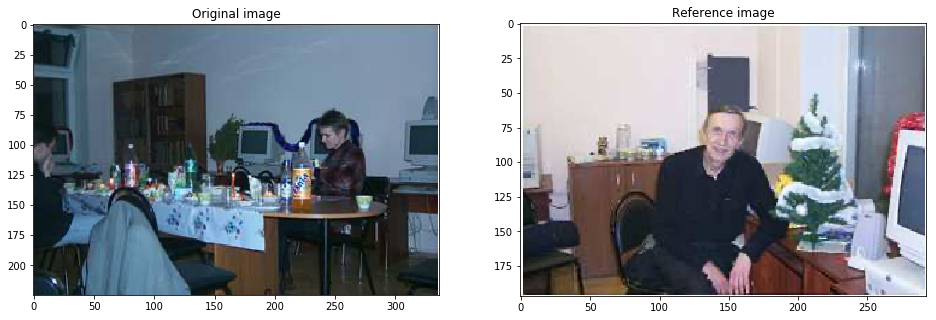

In [141]:
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(orig_image)
plt.title('Original image')

fig.add_subplot(1, 2, 2)
plt.imshow(ref_image)
plt.title('Reference image')

In [142]:
orig_vg = widgets.ColorPicker(
    concise=False,
    description='Original color',
    value='blue',
    disabled=False
)
orig_vg

ColorPicker(value='blue', description='Original color')

In [143]:
ref_vg = widgets.ColorPicker(
    concise=False,
    description='Reference color',
    value='blue',
    disabled=False
)
ref_vg

ColorPicker(value='blue', description='Reference color')

In [144]:
orig_hex = orig_vg.value.lstrip('#')
ref_hex = ref_vg.value.lstrip('#')

RGB_orig_color = tuple(int(orig_hex[i:i+2], 16) for i in (0, 2, 4))
RGB_ref_color = tuple(int(ref_hex[i:i+2], 16) for i in (0, 2, 4))


print('Original RGB =', RGB_orig_color)
print('Reference RGB =', RGB_ref_color)

Original RGB = (125, 152, 173)
Reference RGB = (233, 223, 226)


In [145]:
R_const = RGB_ref_color[0] / RGB_orig_color[0]
G_const = RGB_ref_color[1] / RGB_orig_color[1]
B_const = RGB_ref_color[2] / RGB_orig_color[2]

RGB_const = np.array([R_const, G_const, B_const])

In [146]:
RGB_const

array([1.864     , 1.46710526, 1.30635838])

In [147]:
x = (orig_image * RGB_const)
int_img = x.astype(int)
normilized_img = (x-np.min(x))/(np.max(x)-np.min(x))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'normalized_img')

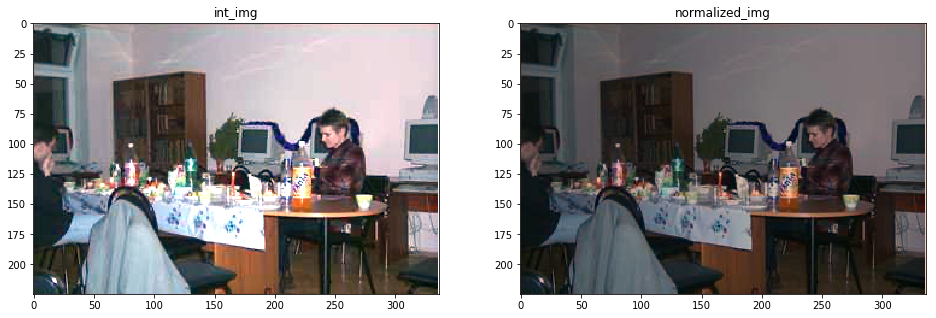

In [148]:
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(int_img)
plt.title('int_img')

fig.add_subplot(1, 2, 2)
plt.imshow(normilized_img)
plt.title('normalized_img')